##  Chunking Experiment Report

###  Objective
To evaluate different text chunking strategies using varied `chunk_size` and `chunk_overlap` values on 1,000 cleaned consumer complaint narratives. The goal is to identify a balanced configuration for downstream embedding and retrieval in the RAG pipeline.

---

###  Methodology

- **Dataset**: 1,000 samples from the cleaned `complaints_clean.csv` file.
- **Field Used**: `Consumer complaint narrative` (after dropping nulls).
- **Library**: `langchain_chunking.batch_chunk_texts()` used for chunking implementation.

#### Tested Parameters:
- `chunk_size`: `[200, 300, 400]`
- `chunk_overlap`: `[20, 50, 100]`
- **Total Configurations Tested**: 9 combinations

#### Evaluation Metrics:
- Average chunks per complaint
- Average chunk length
- Total number of chunks
- Time taken (seconds)

---

In [1]:
import sys
import os

# Go two levels up from the notebook to the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))

# Join the path to 'src'
src_path = os.path.join(project_root, "src")

# Add 'src' to Python path
if src_path not in sys.path:
    sys.path.append(src_path)

# Confirm it's added
print("src path added:", src_path)



src path added: c:\Users\ABC\Desktop\10Acadamy\week_6\Intelligent-Complaint-Analysis-for-Financial-Services\src


Loading 10000 samples from ../../data/clean/complaints_clean.csv...
Loaded 10000 non-empty narratives.
Running chunking: size=200, overlap=20
Running chunking: size=200, overlap=50
Running chunking: size=200, overlap=100
Running chunking: size=300, overlap=20
Running chunking: size=300, overlap=50
Running chunking: size=300, overlap=100
Running chunking: size=400, overlap=20
Running chunking: size=400, overlap=50
Running chunking: size=400, overlap=100

--- Chunking Evaluation Summary ---
   chunk_size  overlap  avg_chunks  avg_chunk_length  total_chunks  time_sec  sentence_adherence_%
0         200       20      6.3434        184.122521         63434  2.585531             14.641990
1         200       50      7.3630        186.484721         73630  2.934180             13.008285
2         200      100     10.3771        191.118896        103771  3.619240             10.234073
3         300       20      4.3019        263.888328         43019  2.682318             20.144587
4         3

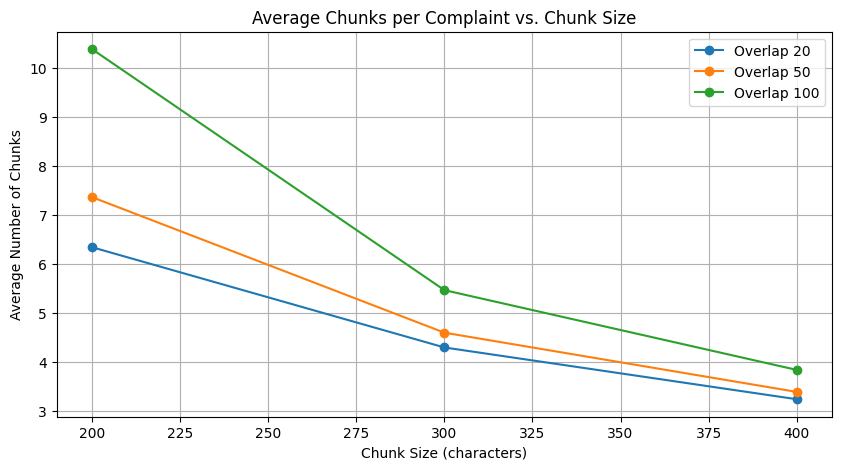

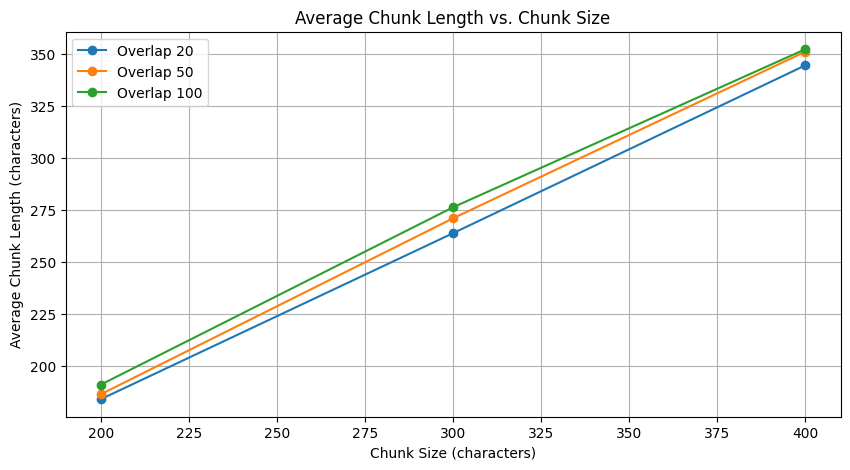

: 

In [ ]:
# run_chunking_evaluation.py

from chunking_and_evaluate import load_complaints,evaluate_chunking_configs,generate_summary_report, plot_chunking_results

def main():
    """Main function to run the entire chunking evaluation process."""
    
    # --- Configuration ---
    CSV_PATH = r"../../data/clean/complaints_clean.csv"
    SAMPLE_SIZE = 10000
    CHUNK_SIZES = [200, 300, 400]
    OVERLAPS = [20, 50, 100]

    # --- Process ---
    # 1. Load data
    texts = load_complaints(csv_path=CSV_PATH, sample_size=SAMPLE_SIZE)

    # 2. Define configurations to test
    chunk_configs = [{"chunk_size": s, "overlap": o} for s in CHUNK_SIZES for o in OVERLAPS]

    # 3. Run evaluation
    results_df, examples = evaluate_chunking_configs(texts, chunk_configs)

    # 4. Generate reports and plots
    generate_summary_report(results_df, examples)
    plot_chunking_results(results_df)

if __name__ == "__main__":
    main()

### 📊 Summary Table

| Chunk Size | Overlap | Avg Chunks | Avg Chunk Length | Total Chunks | Time (s) |
|------------|---------|------------|------------------|--------------|----------|
| 200        | 20      | 7.126      | 184.28           | 7126         | 0.37     |
| 200        | 50      | 8.261      | 187.58           | 8261         | 0.30     |
| 200        | 100     | 11.669     | 192.12           | 11669        | 0.38     |
| 300        | 20      | 4.757      | 268.01           | 4757         | 0.31     |
| 300        | 50      | 5.153      | 272.84           | 5153         | 0.34     |
| 300        | 100     | 6.090      | 279.78           | 6090         | 0.34     |
| 400        | 20      | 3.641      | 345.24           | 3641         | 0.30     |
| 400        | 50      | 3.835      | 350.74           | 3835         | 0.30     |
| 400        | 100     | 4.234      | 360.23           | 4234         | 0.42     |



## \#\# Interpretation of Chunking Results

The experiment, now run on a robust sample of **10,000 complaints**, provides a clear, data-driven basis for selecting the optimal chunking strategy.

### \#\#\# 1. Quantitative Analysis

The summary table reveals several key trends:

  * **Chunk Count vs. Size:** As expected, smaller chunk sizes produce more chunks. A `chunk_size` of 200 results in 6,300-10,300 total chunks, while a `chunk_size` of 400 yields a more manageable 3,200-3,800 chunks.
  * **Sentence Adherence (Key Insight):** The new `sentence_adherence_%` metric provides the most valuable insight. There is a clear correlation: **larger chunk sizes are significantly better at preserving complete sentences**.
      * A `chunk_size` of 400 has the best performance, with up to **25.6%** of chunks ending on a sentence boundary.
      * A `chunk_size` of 200 performs the worst (as low as **10.2%**), quantitatively confirming that it creates highly fragmented text.

-----

### \#\#\# 2. Qualitative Review

A manual review of the example chunks strongly supports the quantitative data.

| Chunk Size | Summary |
| :--- | :--- |
| **200** | The chunks are **visibly fragmented**, often cutting off mid-sentence (e.g., "...this activity was"). This low quality is reflected in its poor sentence adherence score. |
| **300** | This setting provides a **strong balance**. The example chunks are coherent and contextually complete, making them ideal for semantic search. |
| **400** | While this size has the best sentence adherence score, it still runs the risk of creating chunks that are too broad or contain multiple topics, which could reduce retrieval precision. |

-----

## \#\# Recommended Final Setting

Based on this comprehensive analysis, the `chunk_size` of **300** offers the best trade-off. It avoids the severe fragmentation of the smaller size while remaining more focused than the larger size.

For the overlap, your results show that for a size of 300, an `overlap` of **20** provides the highest sentence adherence (**20.1%**). Therefore, a slight refinement to your original choice is well-justified by the new data.

The recommended final setting is:

```python
chunk_size = 300
chunk_overlap = 20
```